<a href="https://colab.research.google.com/github/thermj/Cat-And-Dog-Prediction-Model/blob/main/Cat_And_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the kaggle dataset**

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


# **Extracting from zip file**

In [17]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [19]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


#**Normalization**
Images typically have pixel values in the range [0, 255].
By dividing the image by 255, you normalize these values to the range [0, 1].
This helps in faster convergence during training of neural networks.

In [20]:
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# **Build CNN Model**

In [25]:
#Model with 3 convolutional layers having: 32 filters, 64 filters, 128 filters

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_16 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

# **Compile the model**

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# **Train the model**

In [28]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 105ms/step - loss: 1.4700 - accuracy: 0.5775 - val_loss: 0.7389 - val_accuracy: 0.5708
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5918 - accuracy: 0.6838 - val_loss: 0.5628 - val_accuracy: 0.6898
Epoch 3/10
625/625 [==============================] - 73s 117ms/step - loss: 0.4985 - accuracy: 0.7529 - val_loss: 0.4600 - val_accuracy: 0.7832
Epoch 4/10
625/625 [==============================] - 71s 114ms/step - loss: 0.4269 - accuracy: 0.8012 - val_loss: 0.4649 - val_accuracy: 0.7758
Epoch 5/10
625/625 [==============================] - 69s 110ms/step - loss: 0.3809 - accuracy: 0.8288 - val_loss: 0.5308 - val_accuracy: 0.7636
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3207 - accuracy: 0.8576 - val_loss: 0.4787 - val_accuracy: 0.7670
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2511 - accuracy: 0.8954 - val_loss: 0.4096 - val_ac

# **Evaluate the model**

In [30]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_ds)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


157/157 [==============================] - 10s 59ms/step - loss: 0.7233 - accuracy: 0.8252
Validation accuracy: 82.52%


# **Graphical Representation**

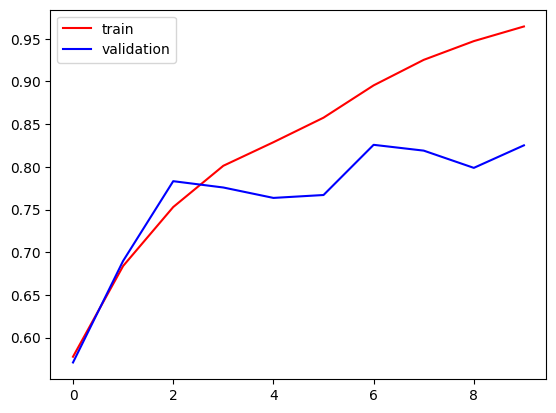

In [31]:
#Accuracy graph

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

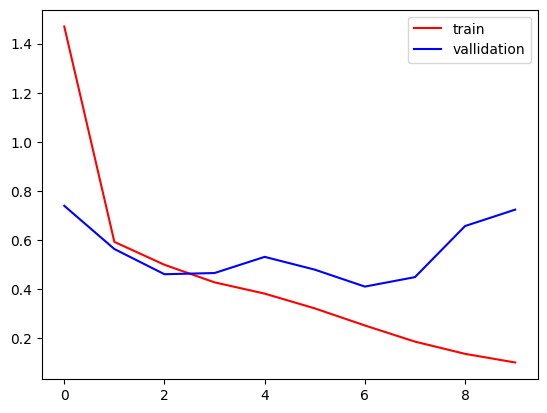

In [32]:
#Loss graph

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='vallidation')
plt.legend()
plt.show()

**Remedies for Overfitting:**
1. Add more data: Increase the size of your training dataset if possible.
2. Data Augmentation: Increase the diversity of your training data through augmentation.
3. L1/L2 Regularizer: Add L1 or L2 regularization to your model's layers.
4. Dropout: Use dropout layers to randomly drop neurons during training
5. Batch Normalization
6. Simplify Model: Reduce the complexity of your model (e.g., fewer layers or parameters).
7. Early Stopping: Stop training when validation loss stops improving.


# **Prediction**

In [33]:
import numpy as np
from tensorflow.keras.models import load_model
# Define your class labels
class_labels = {0: 'Cat', 1: 'Dog'}

In [34]:
 import cv2

In [38]:
test_img = cv2.imread('/content/dog1.jpeg')

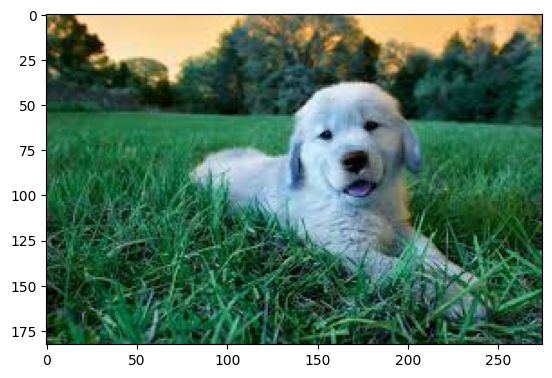

In [39]:
plt.imshow(test_img)

In [40]:
test_img.shape

(183, 275, 3)

In [41]:
test_img = cv2.resize(test_img,(256,256))

In [42]:
test_input = test_img.reshape((1,256,256,3))

In [43]:
prediction = model.predict(test_input)
predicted_index = int(np.round(prediction[0][0]))
predicted_label = class_labels[predicted_index]

print("The image is that of a " + predicted_label)

1/1 [==============================] - 0s 395ms/step
The image is that of a Dog
